In [39]:
import timeit
import numpy as np
import matplotlib.pyplot as plt 
from decimal import Decimal
import random
from scipy.optimize import curve_fit

plt.rcParams["figure.figsize"] = (12,8)
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]  # Default plot size

In [2]:
# Define function for theoretical approximation with non-linear least squares
def func_sqr(x, a, b):
    return a * np.power(x * b, 2) 

def func_log(x, a, b):
    return x * a * np.log(x * b)

def func_cube(x, a, b):
    return a * np.power(x * b, 3) 

Calculating constant function F(v) = 1

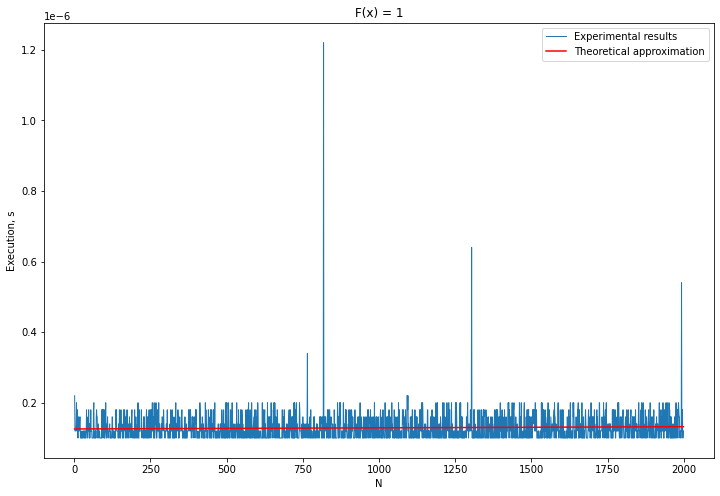

In [40]:
# Define range for N
N = range(1, 2000)
avg_times = []

# Loop through all possible N sizes
for i in N:
    X = np.random.randint(100, size = i)
    F = [None] * i
    times = []
    
    # Calculate function avg execution time
    for rounds in range(0, 5):
        start_time = timeit.default_timer()
       
        F[0] = 1
        
        end_time = timeit.default_timer()
        
        times.append(end_time - start_time)

    avg_times.append(sum(times)/len(times))
    times.clear()

# Find values of parameters for theoretical approximation with least squares
Ar = np.vstack([N, np.ones(len(N))]).T
m, c = np.linalg.lstsq(Ar, avg_times, rcond=None)[0]
    
plt.plot(N, avg_times, label = 'Experimental results', linewidth=1)
plt.plot(N, m*N + c, 'r', label='Theoretical approximation')
plt.ylabel('Execution, s')
plt.xlabel('N')
plt.title("F(x) = 1")
plt.legend()
plt.show()
    

Calculating function of multiply F(v) = П(v) and F(v) = sum(v)

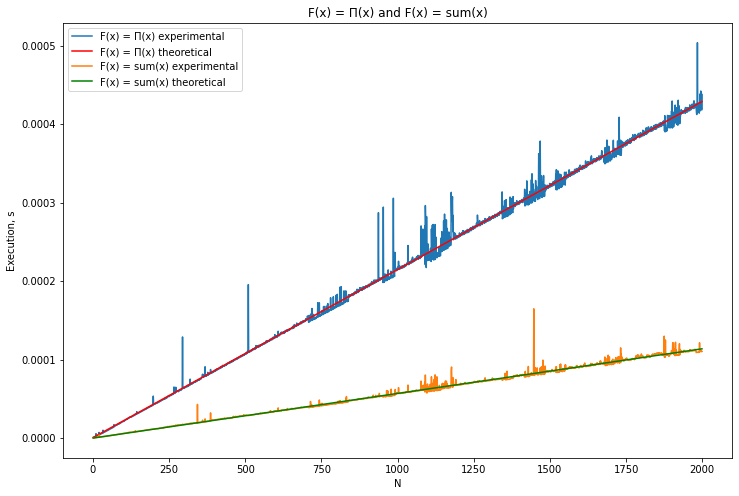

In [49]:
# Define range for N
avg_times = []
avg_times2 = []
N = range(1, 2000)

# Loop through all possible N sizes
for i in N:
    X = [None] * i # Python list instead of Numpy array will be used in order to avoid decimal() convertion error 
    random.seed(1)
    for j in range(0,i):
        X[j] = random.randint(1, 10)
    F_sum = [None] * i
    F_mul = [None] * i
    times = []
    times2 = []
    
    # Calculate function avg execution time
    for rounds in range(0, 5):
        start_time = timeit.default_timer()
       
        result = Decimal(1) # Decimal() is used to avoid possible overflow error
        for item in X:
             result = result * Decimal(item)
        F_mul.append(result)
        
        end_time = timeit.default_timer()
        times.append(end_time - start_time)
        
        start_time = timeit.default_timer()
       
        result = 0
        for item in X:
            result = result + item
        F_sum.append(result)
        
        end_time = timeit.default_timer()
        
        times2.append(end_time - start_time)

    avg_times.append(sum(times)/len(times))
    avg_times2.append(sum(times2)/len(times2))
    times.clear()
    
# Find values of parameters for theoretical approximation with least squares
Ar = np.vstack([N, np.ones(len(N))]).T
m, c = np.linalg.lstsq(Ar, avg_times, rcond=None)[0]

# Find values of parameters for theoretical approximation with least squares
Ar2 = np.vstack([N, np.ones(len(N))]).T
m2, c2 = np.linalg.lstsq(Ar, avg_times2, rcond=None)[0]
    
plt.plot(N, avg_times, label = 'F(x) = П(x) experimental')
plt.plot(N, m*N + c, 'r', label='F(x) = П(x) theoretical')
plt.plot(N, avg_times2, label = 'F(x) = sum(x) experimental')
plt.plot(N, m2*N + c2, color = 'green', label='F(x) = sum(x) theoretical')
plt.ylabel('Execution, s')
plt.xlabel('N')
plt.title("F(x) = П(x) and F(x) = sum(x)")
plt.legend()
plt.show()

Calculating P(1,5) of polynome with naive method and calculating with Gorner method

C:\Users\danil\AppData\Local\Temp/ipykernel_28564/2004431927.py:6: RuntimeWarning: invalid value encountered in log
  return x * a * np.log(x * b)


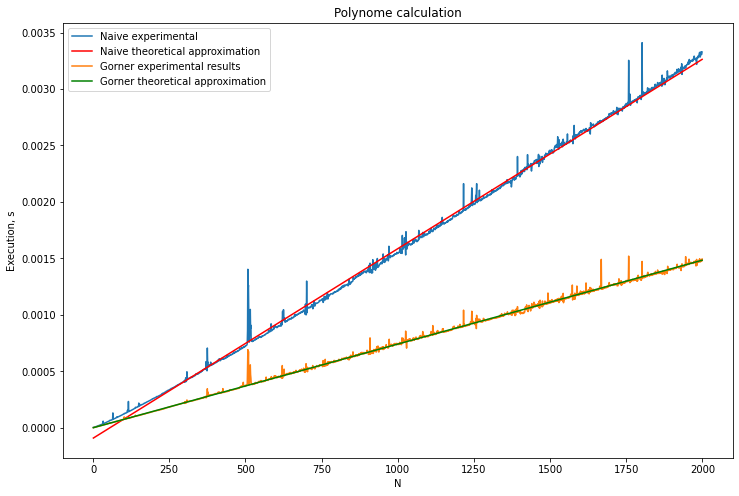

In [62]:
# Define range for N
N = range(1, 2000)
avg_times = []
avg_times2 = []
val_x = 1.5
F = [None] * 2

# Loop through all possible N sizes
for i in N:
    X = [None] * i
    random.seed(1)
    for j in range(0,i):
        X[j] = random.randint(1, 10)
    times = []
    times2 = []
    
    # Calculate polynome avg execution time
    for rounds in range(0, 5):
        start_time = timeit.default_timer()
        
        #Naive polynome calculation
        result = Decimal(0)
        for index in range(0, i):
             result = result + Decimal(X[index]) * (Decimal(val_x) ** Decimal(index))
        F[0] = result
        
        end_time = timeit.default_timer()
        times.append(end_time - start_time)

        start_time = timeit.default_timer()
        
        #Gorner polynome calculation
        result = Decimal(X[i - 1])
        for index in range(i - 2, -1, -1):
            result = result * Decimal(val_x) + Decimal(X[index])
        F[1] = result
        
        end_time = timeit.default_timer()
        times2.append(end_time - start_time)
       
    avg_times.append(sum(times)/len(times))
    times.clear()
    avg_times2.append(sum(times2)/len(times2))
    times2.clear()

# Find values of parameters for Gorner method
popt, pcov = curve_fit(func_log, N, avg_times2, maxfev = 10000)

# Find values of parameters for naive method
Ar = np.vstack([N, np.ones(len(N))]).T
m, c = np.linalg.lstsq(Ar, avg_times, rcond=None)[0]
    
plt.plot(N, avg_times, label = 'Naive experimental')
plt.plot(N, m*N + c, color = 'red', label='Naive theoretical approximation')
plt.plot(N, avg_times2, label = 'Gorner experimental results')
plt.plot(N, func_log(N, *popt), color = 'green', label='Gorner theoretical approximation')
plt.ylabel('Execution, s')
plt.xlabel('N')
plt.title("Polynome calculation")
plt.legend()
plt.show()

Bubble sort algorithm for v

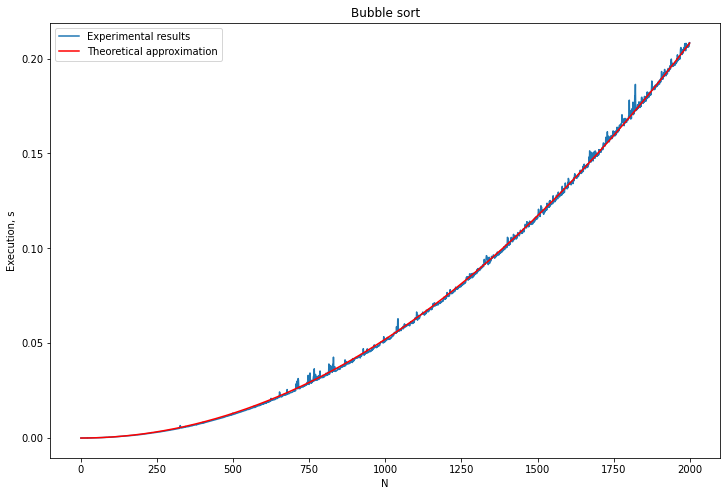

In [63]:
# Define range for N
avg_times = []
N = range(1, 2000)

# Loop through all possible N sizes
for i in N:
    X = [None] * i
    random.seed(1)
    for j in range(0,i):
        X[j] = random.randint(1, 100)
    F = [None] * i
    times = []
    
    for rounds in range(0, 5):
        start_time = timeit.default_timer()
        
        # Calculate bubble sort avg execution time
        for out_i in range(i - 1):
            for inn_i in range(0, i - out_i - 1):
                if X[inn_i] > X[inn_i + 1]:
                    X[inn_i], X[inn_i + 1] = X[inn_i + 1], X[inn_i]
        
        end_time = timeit.default_timer()
        times.append(end_time - start_time)

    avg_times.append(sum(times)/len(times))
    times.clear()
    
# Find values of parameters for Bubble sort approximation using non-linear least squares - curve_fit()
popt, pcov = curve_fit(func_sqr, N, avg_times)
    
plt.plot(N, avg_times, label = 'Experimental results')
plt.plot(N, func_sqr(N, *popt), 'r', label='Theoretical approximation')
plt.ylabel('Execution, s')
plt.xlabel('N')
plt.title("Bubble sort")
plt.legend()
plt.show()

Quicksort algorithm for v

C:\Users\danil\AppData\Local\Temp/ipykernel_28564/2004431927.py:6: RuntimeWarning: invalid value encountered in log
  return x * a * np.log(x * b)


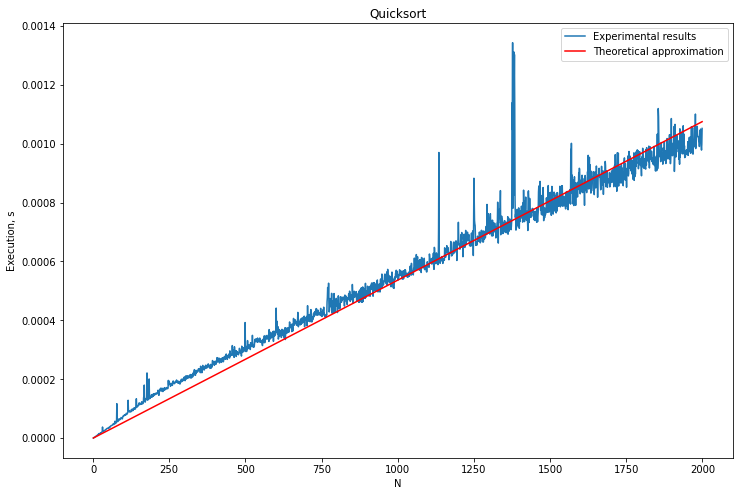

In [65]:
def quicksort(nums):
   if len(nums) <= 1:
       return nums
   else:
       q = random.choice(nums)
       s_nums = []
       m_nums = []
       e_nums = []
       for n in nums:
           if n < q:
               s_nums.append(n)
           elif n > q:
               m_nums.append(n)
           else:
               e_nums.append(n)
       return quicksort(s_nums) + e_nums + quicksort(m_nums)

# Define range for N
avg_times = []
N = range(1, 2000)

# Loop through all possible N sizes
for i in N:
    X = [None] * i
    random.seed(1)
    for j in range(0,i):
        X[j] = random.randint(1, 100)
    F = [None] * i
    times = []
    
    for rounds in range(0, 5):
        start_time = timeit.default_timer()
        
        quicksort(X)
        
        end_time = timeit.default_timer()
        times.append(end_time - start_time)

    avg_times.append(sum(times)/len(times))
    times.clear()
    
# Find values of parameters for Quicksort sort approximation using non-linear least squares and n*log(n) function 
popt, pcov = curve_fit(func_log, N, avg_times, maxfev = 15000)
    
plt.plot(N, avg_times, label = 'Experimental results')
plt.plot(N, func_log(N, *popt), 'r', label='Theoretical approximation')
plt.ylabel('Execution, s')
plt.xlabel('N')
plt.title("Quicksort")
plt.legend()
plt.show()

Hybrid Timsort of v

C:\Users\danil\AppData\Local\Temp/ipykernel_28564/2004431927.py:6: RuntimeWarning: invalid value encountered in log
  return x * a * np.log(x * b)


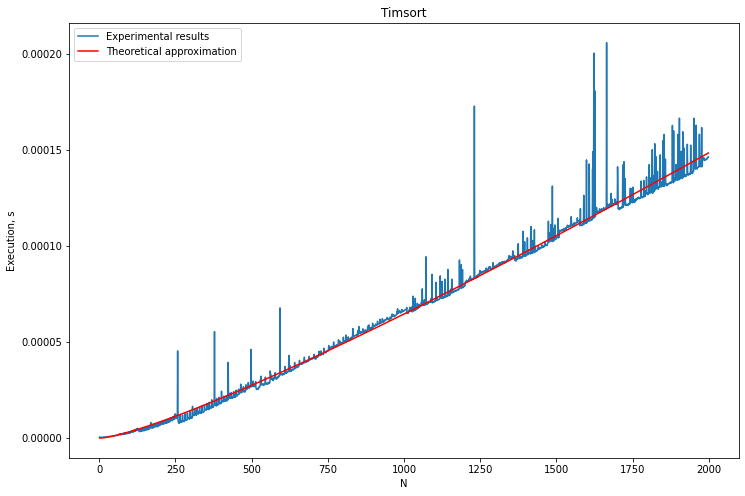

In [67]:
# Define range for N
avg_times = []
N = range(1, 2000)

# Loop through all possible N sizes
for i in N:
    X = [None] * i
    random.seed(1)
    for j in range(0,i):
        X[j] = random.randint(1, 100)
    F = [None] * i
    times = []
    
    for rounds in range(0, 5):
        start_time = timeit.default_timer()
        
        sorted(X)
        
        end_time = timeit.default_timer()
        times.append(end_time - start_time)

    avg_times.append(sum(times)/len(times))
    times.clear()

# Find values of parameters for Timsort sort approximation using non-linear least squares and n*log(n) function 
popt, pcov = curve_fit(func_log, N, avg_times)
    
plt.plot(N, avg_times, label = 'Experimental results')
plt.plot(N, func_log(N, *popt), 'r', label='Theoretical approximation')
plt.ylabel('Execution, s')
plt.xlabel('N')
plt.title("Timsort")
plt.legend()
plt.show()

Calculation of Matrix multiplication

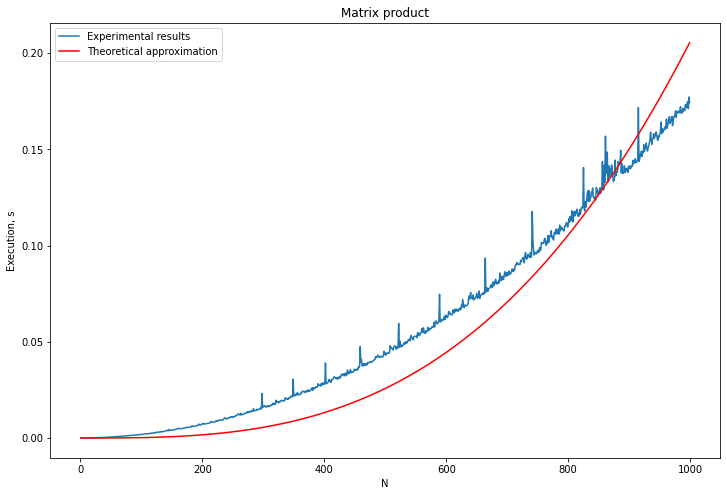

In [71]:
def matrix_multiply(A, B):
    zip_b = zip(*B)
    return [[sum(ele_a*ele_b for ele_a, ele_b in zip(row_a, col_b)) 
             for col_b in zip_b] for row_a in A]

# Define range for N
avg_times = []
N = range(1, 1000)
AB = []

# Loop through all possible N sizes
for i in N:
    A = np.random.randint(1, 100, (i,i))
    B = np.random.randint(1, 100, (i,i))
    times = []
    
    for rounds in range(0, 5):
        start_time = timeit.default_timer()
        
        AB.append(matrix_multiply(A, B))
        
        end_time = timeit.default_timer()
        times.append(end_time - start_time)

    avg_times.append(sum(times)/len(times))
    times.clear()
    
# Find values of parameters for Timsort sort approximation using non-linear least squares and n^3 function 
popt, pcov = curve_fit(func_cube, N, avg_times, maxfev = 1000)
    
plt.plot(N, avg_times, label = 'Experimental results')
plt.plot(N, func_cube(N, *popt), 'r', label='Theoretical approximation')
plt.ylabel('Execution, s')
plt.xlabel('N')
plt.title("Matrix product")
plt.legend()
plt.show()